In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load Dataset

In [2]:
df_original=pd.read_csv('bank-additional-full.csv',sep=';')
df=df_original.copy()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

## Have a look at data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [7]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
df_drop=df[(df["job"]=="unknown")|(df["marital"]=="unknown")|(df["default"]=="unknown")|
   (df["education"]=="unknown")|(df["housing"]=="unknown")|(df["loan"]=="unknown")]
df_drop.shape

(10700, 21)

In [9]:
df1=df.drop(df_drop.index)
df1.shape

(30488, 21)

In [34]:
print(df1.duplicated().sum())
df_new=df1.drop_duplicates(subset=None, keep='first', inplace=False)
df_new.shape

10


(30478, 21)

In [11]:
#df_new.drop("poutcome", axis=1, inplace=True)
#df_new.drop("duration", axis=1, inplace=True)
#df_new.shape

/Users/donglaixu/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(30478, 20)

In [35]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
name=['age','duration','campaign','pdays','previous','emp.var.rate',
      'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for i in name:
    df_new[f'{i}']=StandardScaler().fit_transform(df_new[[f'{i}']])

/var/folders/2k/mw4jbldx2mx1m3941mygzn8h0000gn/T/ipykernel_40374/2985943022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[f'{i}']=StandardScaler().fit_transform(df_new[[f'{i}']])
/var/folders/2k/mw4jbldx2mx1m3941mygzn8h0000gn/T/ipykernel_40374/2985943022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[f'{i}']=StandardScaler().fit_transform(df_new[[f'{i}']])
/var/folders/2k/mw4jbldx2mx1m3941mygzn8h0000gn/T/ipykernel_40374/2985943022.py:6: SettingWithCopyWarning: 
A value is trying to 

In [36]:
df_new.agg(['mean','std']).round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
mean,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
#outliers
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.642408,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.559363,0.211923,-0.371685,nonexistent,0.727467,0.803995,0.877601,0.786088,0.401639,no
2,-0.196436,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.559363,0.211923,-0.371685,nonexistent,0.727467,0.803995,0.877601,0.786088,0.401639,no
3,0.093908,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.559363,0.211923,-0.371685,nonexistent,0.727467,0.803995,0.877601,0.786088,0.401639,no
4,1.642408,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.559363,0.211923,-0.371685,nonexistent,0.727467,0.803995,0.877601,0.786088,0.401639,no
6,1.932752,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-0.559363,0.211923,-0.371685,nonexistent,0.727467,0.803995,0.877601,0.786088,0.401639,no


In [38]:
df_done=pd.get_dummies(df_new.iloc[:,:-1])
df_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30478 non-null  float64
 1   duration                       30478 non-null  float64
 2   campaign                       30478 non-null  float64
 3   pdays                          30478 non-null  float64
 4   previous                       30478 non-null  float64
 5   emp.var.rate                   30478 non-null  float64
 6   cons.price.idx                 30478 non-null  float64
 7   cons.conf.idx                  30478 non-null  float64
 8   euribor3m                      30478 non-null  float64
 9   nr.employed                    30478 non-null  float64
 10  job_admin.                     30478 non-null  uint8  
 11  job_blue-collar                30478 non-null  uint8  
 12  job_entrepreneur               30478 non-null 

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df_done.iloc[:,:],df_new.iloc[:,-1],
                                               test_size=0.25,
                                               stratify=df_new.iloc[:,-1],
                                               random_state=123)

In [60]:
print(Y_train.value_counts())
2893/(2893+19965)

no     19965
yes     2893
Name: y, dtype: int64


0.12656400384985564

In [61]:
print(Y_test.value_counts())
965/(965+6655)

no     6655
yes     965
Name: y, dtype: int64


0.12664041994750655

## Logistic Regression

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,
                           max_features='sqrt',
                           max_depth=8,
                           criterion='gini',
                           n_jobs=-1,
                           random_state=123)
rfc.fit(X_train,Y_train)
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))

0.9083034386210517
0.8969816272965879


In [51]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[5,15,30,50,100],
      'max_features': ['auto', 'sqrt', 'log2'],
       'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']}
gscv = GridSearchCV(RandomForestClassifier(), param_grid=param, cv=3, refit=True)
gscv.fit(X_train,Y_train)
print(gscv.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


## Decision Tree

In [22]:
'''from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
print(dtc.score(X_train,Y_train))
print(dtc.score(X_test,Y_test))'''

'from sklearn.tree import DecisionTreeClassifier\ndtc=DecisionTreeClassifier()\ndtc.fit(X_train,Y_train)\nprint(dtc.score(X_train,Y_train))\nprint(dtc.score(X_test,Y_test))'

In [23]:
'''from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[5,10,30,50,100], 
          'metric':['euclidean','manhattan']}
gscv = GridSearchCV(KNeighborsClassifier(), param_grid=params, # grid of size 10
                    cv=3, # do 3-fold CV at every grid point
                    refit=True) # refit True trains one more time on the entire training set
gscv.fit(X_train,Y_train) 
print(gscv.best_params_)'''

"from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import GridSearchCV\nparams = {'n_neighbors':[5,10,30,50,100], \n          'metric':['euclidean','manhattan']}\ngscv = GridSearchCV(KNeighborsClassifier(), param_grid=params, # grid of size 10\n                    cv=3, # do 3-fold CV at every grid point\n                    refit=True) # refit True trains one more time on the entire training set\ngscv.fit(X_train,Y_train) \nprint(gscv.best_params_)"

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50,metric='manhattan')
knn.fit(X_train,Y_train)
print(knn.score(X_train,Y_train))
print(knn.score(X_test,Y_test))

0.8925102808644676
0.8910761154855643


(None, <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

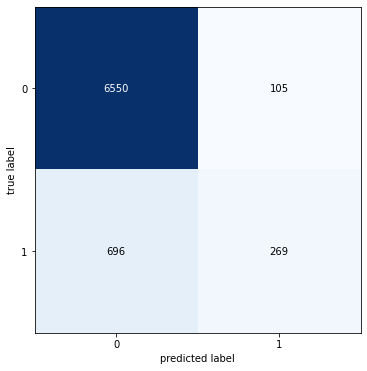

In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
fig,ax = plt.subplots(1,1,figsize=(6,6))

Y_test_pred=cross_val_predict(rfc,X_test,Y_test,cv=3)
plot_confusion_matrix(confusion_matrix(Y_test,Y_test_pred),axis=ax)

In [54]:
from sklearn.metrics import f1_score
f1_score(Y_test,Y_test_pred,pos_label='yes')

0.4017923823749066

In [45]:
feature_importance=pd.Series(rfc.feature_importances_,index=X_test.columns)
feature_importance.sort_values(ascending=False)

duration                         0.298523
nr.employed                      0.116036
euribor3m                        0.109198
emp.var.rate                     0.092160
pdays                            0.061657
cons.conf.idx                    0.058605
poutcome_success                 0.043083
cons.price.idx                   0.027438
age                              0.019318
month_oct                        0.018860
month_may                        0.015905
contact_cellular                 0.014644
poutcome_nonexistent             0.014276
month_mar                        0.009328
contact_telephone                0.008568
poutcome_failure                 0.008266
campaign                         0.008079
previous                         0.006347
month_apr                        0.006138
month_jun                        0.003916
job_retired                      0.003629
education_university.degree      0.003142
day_of_week_mon                  0.003126
job_blue-collar                  0

In [46]:
feature_importance[feature_importance>0.01].index

Index(['age', 'duration', 'pdays', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'contact_cellular',
       'month_may', 'month_oct', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [47]:
df_done1=df_done[feature_importance[feature_importance>0.01].index]
X_train_new,X_test_new,Y_train_new,Y_test_new=train_test_split(df_done1.iloc[:,:],df_new.iloc[:,-1],
                                               test_size=0.25,
                                               stratify=df_new.iloc[:,-1],
                                               random_state=123)

In [55]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[5,15,30,50,100],
      'max_features': ['auto', 'sqrt', 'log2'],
       'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']}
gscv = GridSearchCV(RandomForestClassifier(), param_grid=param, cv=3, refit=True)
gscv.fit(X_train_new,Y_train_new)
print(gscv.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 50}


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc_new=RandomForestClassifier(n_estimators=50,
                               max_depth=8,
                               max_features='log2',
                               criterion='gini',
                               n_jobs=-1,random_state=123)
rfc_new.fit(X_train_new,Y_train_new)
print(rfc_new.score(X_train_new,Y_train_new))
print(rfc_new.score(X_test_new,Y_test_new))

0.9232653775483419
0.9026246719160105


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

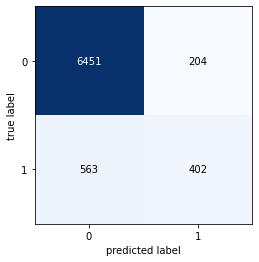

In [57]:
Y_test_pred_new=cross_val_predict(rfc_new,X_test_new,Y_test_new,cv=3)
plot_confusion_matrix(confusion_matrix(Y_test_new,Y_test_pred_new))

In [58]:
f1_score(Y_test_new,Y_test_pred_new,pos_label='yes')

0.5117759388924253